# Chapter 3 Lab & Exercises


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

%matplotlib inline

In [8]:
# plt.style.available
plt.style.use("ggplot")

# Lab
In the book, the lab focuses on performing a linear regression on the Boston dataset. We will do so using seaborn, statsmodels and scikit learn

In [9]:
boston = pd.read_csv('../data/boston.csv')
boston.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


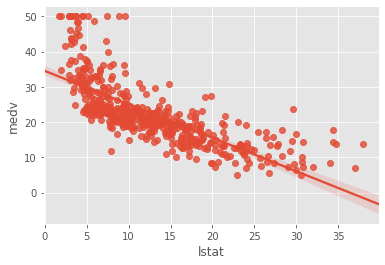

In [10]:
sns.regplot('lstat', 'medv', data=boston);

In [11]:
# statsmodels
results = smf.ols('medv ~ lstat', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           5.08e-88
Time:                        17:19:29   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

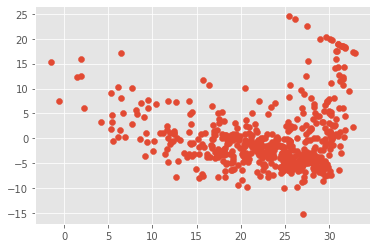

In [12]:
# look at residuals
# Yikes. lots of nonlinearity. Need a different model
plt.scatter(results.fittedvalues, results.resid);

In [13]:
# Get all columns. No easy way to do this like in R
# Mostly highly significant variables
string_cols = ' + '.join(boston.columns[:-1])
results = smf.ols('medv ~ {}'.format(string_cols), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 02 Apr 2020   Prob (F-statistic):          6.72e-135
Time:                        17:20:16   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# remove age
string_cols = ' + '.join(boston.columns[:-1].difference(['age']))
results = smf.ols('medv ~ {}'.format(string_cols), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 02 Apr 2020   Prob (F-statistic):          6.08e-136
Time:                        17:25:35   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
black          0.0093      0.003      3.481      0.001       0.004       0.015
chas           2.6890      0.860      3.128      0.002       1.000       4.378
crim          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
dis           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
indus          0.0206      0.061      0.335      0.738      -0.100       0.141
lstat         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
nox          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
ptratio       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
rad            0.3058      0.066      4.627      0.000       0.176       0.436
rm             3.8144      0.408      9.338      0.000       3.012       4.617
tax           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
zn             0.0463      0.014      3.404      0.001       0.020       0.073
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Interaction
results = smf.ols('medv ~ lstat * age', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           4.86e-88
Time:                        17:25:41   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Interaction
results = smf.ols('medv ~ lstat + np.power(lstat, 2) + np.power(lstat, 3)', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     321.7
Date:                Thu, 02 Apr 2020   Prob (F-statistic):          1.78e-116
Time:                        17:26:42   Log-Likelihood:                -1568.9
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     502   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             48.6496      1.435     33.909      0.000      45.831      51.468
lstat                 -3.8656      0.329    -11.757      0.000      -4.512      -3.220
np.power(lstat, 2)     0.1487      0.021      6.983      0.000       0.107       0.191
np.power(lstat, 3)    -0.0020      0.000     -5.013      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      107.925   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.171
Skew:                           1.088   Prob(JB):                     8.69e-57
Kurtosis:                       5.741   Cond. No.                     5.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
from statsmodels.stats.anova import anova_lm

In [26]:
results1 = smf.ols('medv ~ lstat', data=boston).fit()
results2 = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()

anova_lm(results1, results2)

/Users/renierbotha/anaconda3/envs/data-science/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/renierbotha/anaconda3/envs/data-science/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/renierbotha/anaconda3/envs/data-science/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


In [29]:
results2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:               OLS              Adj. R-squared:     0.639    
Dependent Variable:  medv             AIC:                3168.5160
Date:                2020-04-02 17:32 BIC:                3181.1956
No. Observations:    506              Log-Likelihood:     -1581.3  
Df Model:            2                F-statistic:        448.5    
Df Residuals:        503              Prob (F-statistic): 1.56e-112
R-squared:           0.641            Scale:              30.511   
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          42.8620   0.8721  49.1489 0.0000 41.1486 44.5754
lstat              -2.3328   0.1238 -18.8430 0.0000 -2.5761 -2.0896
np.power(lstat, 2)  0.0435   0.0037  11.6275 0.0000  0.0362  0.0509
-------------------------------------------------------------------
Omnibus:              107.006       Durbin-Watson:          0.921  
Prob(Omnibus):        0.000         Jarque-Bera (JB):       228.388
Skew:                 1.128         Prob(JB):               0.000  
Kurtosis:             5.397         Condition No.:          1135   
===================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [50]:
# Manually compute F
(results1.ssr - results2.ssr) / (results2.ssr / results2.df_resid)

135.19982210087167

In [30]:
anova_lm(results2)

,df,sum_sq,mean_sq,F,PR(>F)
lstat,1.0,23243.913997,23243.913997,761.810354,8.819026e-103
"np.power(lstat, 2)",1.0,4125.138260,4125.138260,135.199822,7.630116e-28
Residual,503.0,15347.243158,30.511418,NaN,NaN


In [52]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           5.08e-88
Time:                        12:49:09   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Car seats Data

In [31]:
carseats = pd.read_csv('../data/carseats.csv')
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [32]:
results = smf.ols('Sales ~ ShelveLoc', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     92.23
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           1.27e-33
Time:                        17:37:12   Log-Likelihood:                -906.03
No. Observations:                 400   AIC:                             1818.
Df Residuals:                     397   BIC:                             1830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.5229      0.239     23.131      0.000       5.054       5.992
ShelveLoc[T.Good]       4.6911      0.348     13.464      0.000       4.006       5.376
ShelveLoc[T.Medium]     1.7837      0.286      6.229      0.000       1.221       2.347
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.092
Skew:                           0.033   Prob(JB):                        0.955
Kurtosis:                       2.966   Cond. No.                         4.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Exercises

## Conceptual

### Problem 1
There are 3 different null hypotheses for each of TV, Radio and Newspaper each testing whether there is a relationship from that variable to Sales given that the other two variables are held constant. From this model we can reject the null hypotheses that both TV and Radio have no correspondence with sales. We fail to reject the null hypotheses that Newspaper advertising is related to Sales.

### Problem 2
KNN classification predicts as the category who has the highest frequency among it's k nearest neighbors. KNN regression predicts the mean of its nearest K neighbors.

### Problem 3
a) iii is correct. Males will earn more than females GPA is high enough. Higher than 3.5 to be exact to wipe away the female advantage.  
b) 50 + (20 * 4) + (.07 * 110) + (35 * 1) + (.01 * 110 * 4)  - (10 * 1 * 4) = 137.1  
c) False, it all comes down to the standard error of the coefficient to determine significance. It could very well be the most significant factor.

### Problem 4
a) For training data, the RSS always decreases as model complexity increases so the cubic model will have lower RSS.  
b) For test data, the RSS for the linear model should do better as the cubic model will have fit noise and the true model is linear.  
c) Cubic model. Same answer as a)  
d) This would be impossible to know. It could go both ways as the true model is not known. Must compute RSS on test data in this case

### Problem 5
Combining the first equation $\hat{y_i} = x_i\hat{\beta}$ with (3.38) we get 

$$\hat{y_i} = x_i \frac{\sum\limits_{k=1}^n x_k y_k}{\sum\limits_{j=1}^nx_j^2}
$$

The $x_i$ outside of the summation is a constant and be distributed inside the summation. $$\hat{y_i} = \sum\limits_{k=1}^n (\frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2})y_k$$

$a_i$ is everything between the parentheses. $$a_i = \frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2}$$

### Problem 6
Just rearrange the second equation in 3.4 and you have the equality 

### Problem 7

(Skipped)

## Applied

### Problem 8

In [35]:
auto = pd.read_csv('../data/auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [36]:
results = smf.ols('mpg ~ horsepower', data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           7.03e-81
Time:                        10:42:25   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i) Yes there is strong evidence of a relationship between mpg and horsepower  
ii) Just from the summary it is very strong as the t-statistic is -24 though there is still lots of variation left in the model with an r-squared of .6  
iii) negative  
iv) mpg = 39.94 - 0.1578*98 = 24.46 

In [54]:
# Check the prediction
results.predict({'horsepower': 98}, interval='confidence')

TypeError: predict() got an unexpected keyword argument 'interval'

In [53]:
results.get_prediction({'horsepower': 98}).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


### Problem 9

a) 

b) 

c) 


#### d)

#### e) Add interaction effects

### Problem 10

In [99]:
carseats = pd.read_csv('../data/carseats.csv')
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
